# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5) => Distribucion Normal(media, deviacion estandar)
* Y estimada Ye = 5 + 1.9 * x + e => Calcular a y b utilizando la tecnica de la regrecion lineal y ver como se comportan los cabion en la eficacia del modelo.
* e estará distribuído según una N(0, 0.8) => error centredo en media 0 para no probocar desplazamientos en el modelo

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100) # np.random.randn(100) => Genera la normal de tamaño 100

In [3]:
res = 0 + 0.8 * np.random.randn(100) # Reciduo o errore con distribucion normal

In [4]:
y_pred = 5 + 0.3 * x # Y de la predicion segun lo escrito, lo que devuelve el modelo lineal

In [5]:
y_act = 5 + 0.3 * x + res # Y actual es lo que observamos, son los datos con los que se cuenta

#### Crando el Dataframe de datos

Ordenar para formato lsita del data frame

In [6]:
# comvercion de los tres arrays a lista
x_list = x.tolist() # pasando x a lista
y_pred_list = y_pred.tolist() # pasando y_pred a lista
y_act_list = y_act.tolist() # y_act => Datos que realmente se tienen a lista



In [7]:
# Creando Data Frame
# Se crea un diccionario con las claves y los valores
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
# Ver el Dataframe creado
data.head() 

,x,y_actual,y_prediccion
0,1.492252,6.155649,5.447675
1,4.221900,6.832313,6.266570
2,-0.442158,3.338905,4.867353
3,3.889511,5.493539,6.166853
4,0.701185,3.268856,5.210356


In [9]:
# Realizar un plot del valor actual (el que somos capaces de medir) y la predicion 
# del mismo frente a la variable de entrada x.
# PERMITE RESPODER : Simulando que alguin ya ha echo el  modelo lineal basandoce en unos 
# datos, lo que se quiere comprobar es que tan preciso se supone que es la ecuacion 
# que se esta usando para la prediccion con respecto a los valores que realmente se tienen

import matplotlib.pyplot as plt # Libreria para graficos

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)] # vector, promedio de las Y's

Text(0.5, 1.0, 'Valor Actual vs Predicción')

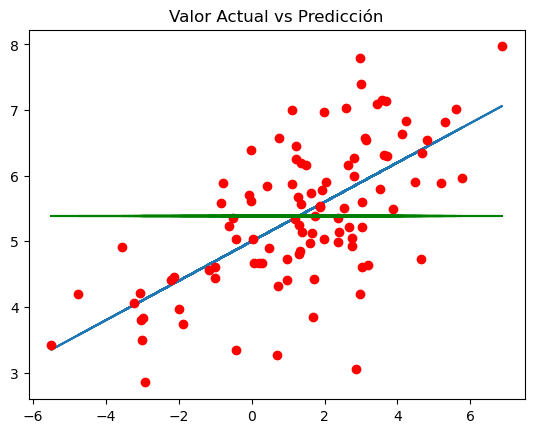

In [11]:
# Grafico que reprecente todo en un mismo sitio
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro") # ro => Color Rojo
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

# ¿Por que se decidio pintar el Y promedio de toas las Y_actuale en el mismo grafico?
# R/ En el caso que no se tiene un modelo predictor demaciado bueno lo mejor que se 
# puede hacer es elegir el promedio de los valores observados y decidir si ese 
# promedio es una bueno forma o  no de predecir los valores.

# Otoro punto para jusgar la eficacia del modelo si se tienen dos variables, 
# una de entrada y otra de salida, es ver los valores de alfa y beta
# que el programa estaistico genera, como entender los valores en python o en R
# SSD => Suma del cuadrado de las diferencias,es la distancia del punto real al modelo predictivo 
# SST => Suma de los cuadrados totales, es la distacia del punto real al promedio de Y
# SSR => Suma de los cuadrado de la regrecion, es la distacia de la prediccion al promedio 
# SST = SSR + SSD,  SST tambien la suma total del error total cometido,
# lo que mas importa es que SSR se grande y SSD sea pequeño, lo que se quiere es que 
# SSR se hacerque  lo mas pocible a SST
# para sober si una regrecion es util o no se tiene el estadistico R^2 = SSR/SST , valor 
# entre 0 y 1, entre mas cerca a uno mejor sera el modelo comparar dos modelos con 
# factores de R^2=0.6 y R^2=0.9, el que mojor explicaria los datos seria del modelo es R^2=0.9 
# R^2 es solo un modo de medir por lo cual no se debe tomar como valor decisorio final, 
# solo es un buen indicador que el modelo de regrecion lineal es efectivo

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [12]:
# Añadir las columnas SSR, SSD y SST al dataset
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,1.492252,6.155649,5.447675,0.004234,0.501226,0.597598
1,4.221900,6.832313,6.266570,0.781397,0.320065,2.101658
2,-0.442158,3.338905,4.867353,0.265484,2.336153,4.176706
3,3.889511,5.493539,6.166853,0.615048,0.453352,0.012307
4,0.701185,3.268856,5.210356,0.029669,3.769420,4.467929


In [14]:
# Suma de los cuadrados de las diferencias SSR, SSD y SST 
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

51.44429206823503

In [16]:
SSD

69.72765287085554

In [17]:
SST

117.40759608328638

In [18]:
SSR+SSD

121.17194493909057

In [19]:
R2 = SSR/SST

In [20]:
R2

0.43816834501697466

(array([ 3., 10., 14., 22., 23., 18.,  4.,  4.,  1.,  1.]),
 array([-1.90110978, -1.43154868, -0.96198757, -0.49242647, -0.02286536,
         0.44669575,  0.91625685,  1.38581796,  1.85537907,  2.32494017,
         2.79450128]),
 <BarContainer object of 10 artists>)

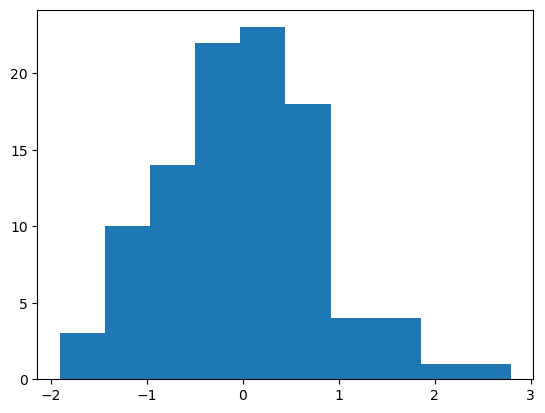

In [21]:
# Observar graficamente la distribucion normal de SSD, (la distribucion del error)
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión lineal

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"]) # Media de x
y_mean = np.mean(data["y_actual"]) # Media de Y, raya verde orizontal anterior
x_mean, y_mean

(1.366513611133166, 5.382603657023449)

In [23]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean) # numerador de la beta (covarianza)
data["beta_d"] = (data["x"]-x_mean)**2 # varianza de x, denominador

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(4.987073284814425, 0.28944488293902526)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.492252,6.155649,5.447675,0.004234,0.501226,0.597598,0.097201,0.015810,5.418998
1,4.221900,6.832313,6.266570,0.781397,0.320065,2.101658,4.139482,8.153234,6.209081
2,-0.442158,3.338905,4.867353,0.265484,2.336153,4.176706,3.696380,3.271292,4.859093
3,3.889511,5.493539,6.166853,0.615048,0.453352,0.012307,0.279889,6.365517,6.112872
4,0.701185,3.268856,5.210356,0.029669,3.769420,4.467929,1.406337,0.442662,5.190028


In [29]:
# Comparar el coeficiente de determinacion R^2 se ajusta mejor que el anterior
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(47.81833779538783, 69.5892582878984, 117.40759608328638)

In [31]:
R2 = SSR / SST
R2

0.40728487244953515

Text(0.5, 1.0, 'Valor Actual vs Predicción')

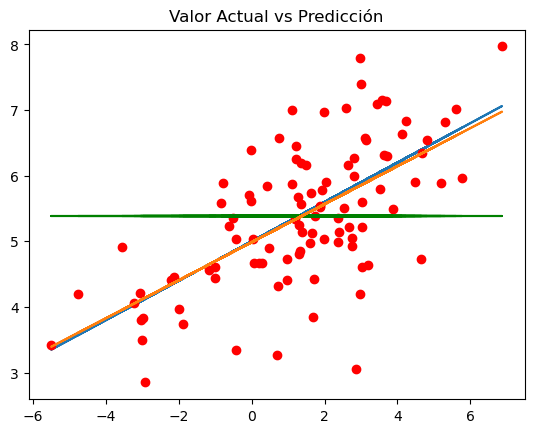

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)] # Valor deve reacalcularce 
# para el nuevo modelo 
# SST no cambiara debido a que es la distancia que separa el dato real con el promedio
# SST => Cuanto porcentaje de datos es capas de eplicar el modelo, lasuma de los cuadrados
# de los residuos acabaria siendo igual a la suma de los cuadrados totales y por tanto el 
# factor R^2 seria 1

# CAUNDO LOS DATOS ESTAN MUY DISPERSOS TALVES EL MODELO LINEAL NO SEA EL MOJOR DE LOS 
# METODOS PARA REPRECENTAR LOS DATOS
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8426710344645139

In [34]:
np.mean(data["y_actual"])

5.382603657023449

In [35]:
RSE / np.mean(data["y_actual"])

0.15655453905935673